In [2]:
print('Regression on Boston Housing Data')

Regression on Boston Housing Data


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()

boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_labels = pd.Series(boston.target)

print('\nPreview of data:\n ')
print(boston_data.head())

print('\nPreview of target labels:\n ')
print(boston_labels.head())


Preview of data:
 
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

Preview of target labels:
 
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64


In [5]:
#Meaning of features:
#CRIM     per capita crime rate by town
#ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS    proportion of non-retail business acres per town
#CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX      nitric oxides concentration (parts per 10 million)
#RM       average number of rooms per dwelling
#AGE      proportion of owner-occupied units built prior to 1940
#DIS      weighted distances to five Boston employment centres
#RAD      index of accessibility to radial highways
#TAX      full-value property-tax rate per $10,000
#PTRATIO  pupil-teacher ratio by town
#B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT    % lower status of the population
#MEDV     Median value of owner-occupied homes in $1000's

In [6]:
from sklearn.model_selection import train_test_split

boston_data_train,boston_data_test,boston_labels_train,boston_labels_test = train_test_split(boston_data,boston_labels,test_size=0.2,random_state=42)

print('boston_data_train size: ',boston_data_train.shape,'\nboston_labels_train size: ',boston_labels_train.shape)
print('\nboston_data_test size: ',boston_data_test.shape,'\nboston_labels_test size: ',boston_labels_test.shape)

boston_data_train size:  (404, 13) 
boston_labels_train size:  (404,)

boston_data_test size:  (102, 13) 
boston_labels_test size:  (102,)


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Features like "RM" and "LSTAT" have strong correlation with target.


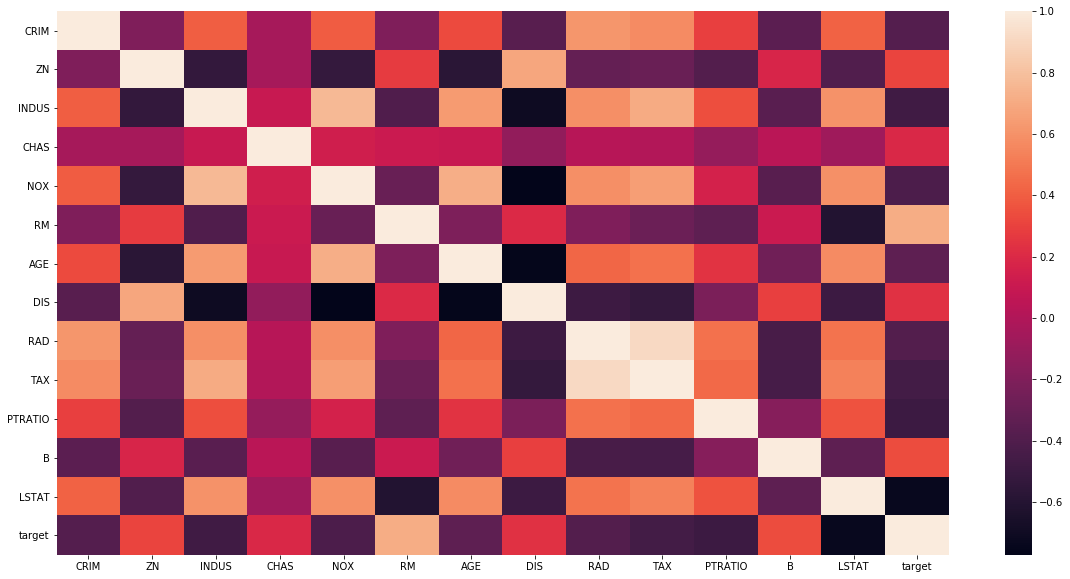

In [7]:
boston_data_train['target'] = boston_labels_train
cor = boston_data_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor)
boston_data_train.drop(['target'],axis=1,inplace=True)
print('Features like "RM" and "LSTAT" have strong correlation with target.')

Distribution plot for attributes "RM" and "LSAT". These features have strong correlation with the target.


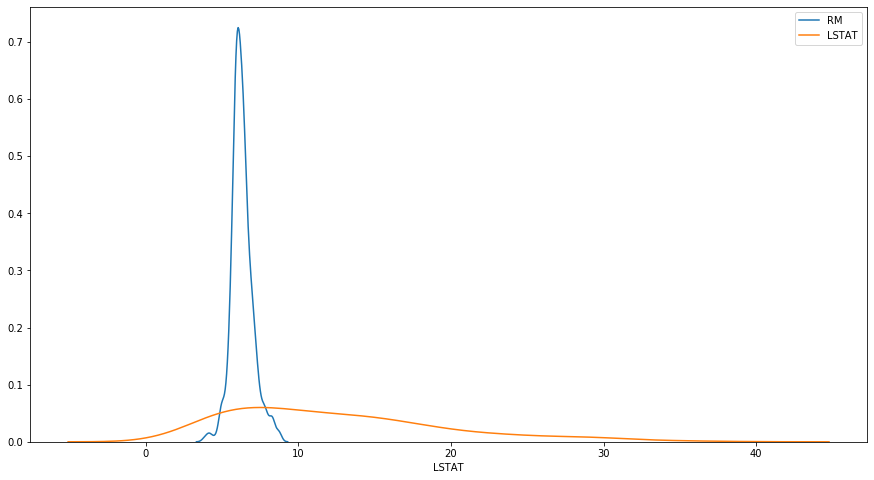

In [182]:
print('Distribution plot for attributes "RM" and "LSAT". These features have strong correlation with the target.')
plt.figure(figsize=(15,8))
sns.distplot(boston_data_train['RM'],hist=False,label='RM')
sns.distplot(boston_data_train['LSTAT'],hist=False,label='LSTAT')

In [183]:
print('Mean\n',boston_data_train.mean())
print('\nStandard deviation\n',boston_data_train.std())
print('\nLooking at the data, we infer that the mean value of features vary greatly, moreover standard deviation '+
     'values of some features is too big, thus we need to scale the features.')

Mean
 CRIM         3.609125
ZN          11.569307
INDUS       10.985050
CHAS         0.071782
NOX          0.556484
RM           6.315891
AGE         68.556436
DIS          3.808195
RAD          9.356436
TAX        404.032178
PTRATIO     18.318317
B          356.278342
LSTAT       12.457351
dtype: float64

Standard deviation
 CRIM         8.875058
ZN          23.152481
INDUS        6.894618
CHAS         0.258447
NOX          0.117704
RM           0.709452
AGE         27.994922
DIS          2.131226
RAD          8.589721
TAX        166.172655
PTRATIO      2.228701
B           91.566533
LSTAT        7.110381
dtype: float64

Looking at the data, we infer that the mean value of features vary greatly, moreover standard deviation values of some features is too big, thus we need to scale the features.


In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp = scaler.fit_transform(boston_data_train)
boston_data_train_prep_1 = pd.DataFrame(temp,columns=boston_data_train.columns)
print('Preview of data after Scaling using standard deviation method:\n')
print(boston_data_train_prep_1.head())

Preview of data after Scaling using standard deviation method:

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787  


Distribution plot for attributes "RM" and "LSAT" after scaling.


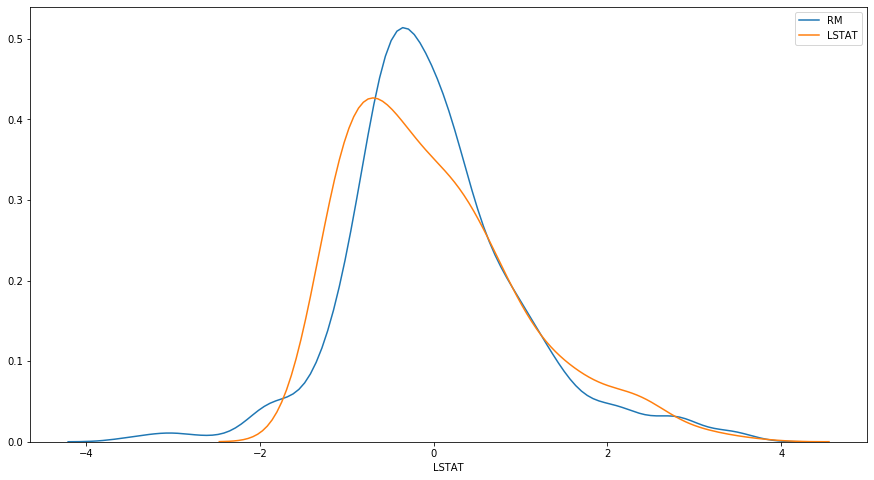

In [185]:
print('Distribution plot for attributes "RM" and "LSAT" after scaling.')
plt.figure(figsize=(15,8))
sns.distplot(boston_data_train_prep_1['RM'],hist=False,label='RM')
sns.distplot(boston_data_train_prep_1['LSTAT'],hist=False,label='LSTAT')

In [186]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston_data_train_prep_1,boston_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
train_pred_1 = lin_reg.predict(boston_data_train_prep_1)

from sklearn.metrics import mean_squared_error

train_rmse_1 = np.sqrt(mean_squared_error(train_pred_1,boston_labels_train))
print('Training error with degree 1 polynomial function: ',train_rmse_1)

boston_data_test_prep_1 = scaler.fit_transform(boston_data_test)

test_pred_1 = lin_reg.predict(boston_data_test_prep_1)
test_rmse_1 = np.sqrt(mean_squared_error(test_pred_1,boston_labels_test))
print('Test error with degree 2 polynomial function: ',test_rmse_1)

Training error with degree 1 polynomial function:  4.6520331848801675
Test error with degree 2 polynomial function:  5.235153893090187


We will try to use polynomial features with linear model.
Looking at the plot, we can observe that the test error decreases slightly when 2nd order polynomial function is fit to the data.



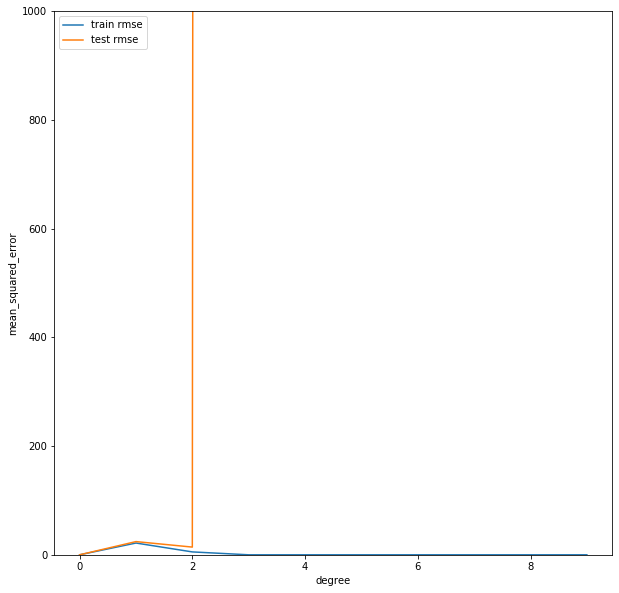

In [188]:
print('We will try to use polynomial features with linear model.')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

train_rmse = np.empty(10)
test_rmse = np.empty(10)

for deg in range(1,10):
    mypipeline = make_pipeline(
        PolynomialFeatures(degree=deg),
        LinearRegression()
    )
    mypipeline.fit(boston_data_train,boston_labels_train)
    train_rmse[deg] = mean_squared_error(mypipeline.predict(boston_data_train),boston_labels_train)
    test_rmse[deg] = mean_squared_error(mypipeline.predict(boston_data_test),boston_labels_test)
    
plt.figure(figsize=(10,10))
plt.plot(train_rmse,label='train rmse')
plt.plot(test_rmse,label='test rmse')
plt.ylim(0.0,1000.0)
plt.xlabel('degree')
plt.ylabel('mean_squared_error')
plt.legend(loc='upper left')
print('Looking at the plot, we can observe that the test error decreases slightly when 2nd order polynomial '+
     'function is fit to the data.\n')

In [190]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())

pipe.fit(boston_data_train,boston_labels_train)

boston_data_train_pred_2 = pipe.predict(boston_data_train)

boston_data_test_pred_2 = pipe.predict(boston_data_test)

train_rmse_2 = np.sqrt(mean_squared_error(boston_data_train_pred_2,boston_labels_train))
test_rmse_2 = np.sqrt(mean_squared_error(boston_data_test_pred_2,boston_labels_test))

print('Train error with degree 2 polynomial function: ',train_rmse_2)
print('Test error with degree 2 polynomial function: ',test_rmse_2)

Train error with degree 2 polynomial function:  2.265664680327531
Test error with degree 2 polynomial function:  3.783482524597674


In [191]:
print('Thus, there is reduction in test error by 2 units when we used 2nd order polynomial hypothesis function.')

Thus, there is reduction in test error by 2 units when we used 2nd order polynomial hypothesis function.
